# Machine Learning with Tensorflow

## Ch09. Convolutional Neural Networks

## 1. Fully Connected Network - 이미지 분류

![](https://ml4a.github.io/images/figures/mnist-input.png)
- 출처: https://ml4a.github.io/images/figures/mnist-input.png

## 이미지 분류의 Fully Connected Network의 문제

- 학습 파라미터의 수
  - 28 * 28 * 10 * 3 = 23,520
  - 256 * 256 * 10 * 3 = 1,966,080 
- 학습 속도
- 위치 정보 소실


## 2. Convolution Neural Network

- Convolution Neural Network 예시

![](https://taewanmerepo.github.io/2018/01/cnn/head.png)

## 3. Convolution Neural Network의 주요 컴포넌트

### 3.1 Convolution, 합성곱

### 합성곱

> <font size=5>합성곱 연산은 두 함수 f, g 가운데 하나의 함수를 반전(reverse), 전이(shift)시킨 다음, 다른 하나의 함수와 곱한 결과를 적분하는 것을 의미한다.</font>

<font size=5>$(f*g)(t)=\int _{{-\infty }}^{\infty }f(\tau )g(t-\tau )\,d\tau $</font>

<font size=5>$(f*g)(t)=\int _{{-\infty }}^{\infty }f(t-\tau )g(\tau )\,d\tau $</font>

- 출처: https://ko.wikipedia.org/wiki/%ED%95%A9%EC%84%B1%EA%B3%B1

![](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)
- 출처: http://deeplearning.stanford.edu

### 3. 2 Channel

![](https://taewanmerepo.github.io/2018/01/cnn/channel.jpg)

- 39 X 31 컬러 사진 shape은 (39, 31, 3)
- 39 X 31 흑백 사진 shape은 (39, 31, 1)

### 3.3 Filter & Stride

- Filter, Kernel

![](https://taewanmerepo.github.io/2018/01/cnn/conv.png)

- Stride
  - 지정된 간격으로 필터를 순회하는 간격이 Stride
  - strid가 1이면 1 픽셀 간격으로 입력 데이터에 순회
  - strid가 2이면 필터는 2칸씩 이동하면서 합성곱을 계산
  
![](https://taewanmerepo.github.io/2018/01/cnn/filter.jpg)

- 복수 채널의 합성곱 처리 절차

![](https://taewanmerepo.github.io/2018/01/cnn/mchannel.jpg)

- n개의 필터를 설정할 경우 출력데이터는 n개의 채널을 갖음

### 3.4 패딩(Padding)

Convolution 레이어에서 Filter와 Stride에 작용으로 Feature Map 크기는 입력데이터 보다 작습니다. Convolution 레이어의 출력 데이터가 줄어드는 것을 방지하는 방법이 패딩입니다. 패딩은 입력 데이터의 외각에 지정된 픽셀만큼 특정 값으로 채워 넣는 것을 의미합니다. 보통 패딩 값으로 0으로 채워 넣습니다.

![](https://taewanmerepo.github.io/2018/01/cnn/padding.png)

### 3.5 Pooling 레이어

- 풀링 레이어는 컨볼류션 레이어의 출력 데이터를 입력으로 받아서 출력 데이터(Activation Map)의 크기를 줄이거나 특정 데이터를 강조하는 용도
- 플링 레이어를 처리하는 방법으로는 Max Pooling과 Average Pooning, Min Pooling
- 일반적으로 Pooing 크기와 Stride를 같은 크기로 설정, 모든 원소가 한 번씩 처리

![](https://taewanmerepo.github.io/2018/01/cnn/pooling.jpg)

## 4. 실습

### 4.1 CIFAR-10 데이터

In [64]:
import pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [2]:
import numpy as np

def clean(data):
    imgs = data.reshape(data.shape[0], 3, 32, 32)
    grayscale_imgs = imgs.mean(1)
    cropped_imgs = grayscale_imgs[:, 4:28, 4:28]
    img_data = cropped_imgs.reshape(data.shape[0], -1)
    img_size = np.shape(img_data)[1]
    means = np.mean(img_data, axis=1)
    meansT = means.reshape(len(means), 1)
    stds = np.std(img_data, axis=1)
    stdsT = stds.reshape(len(stds), 1)
    adj_stds = np.maximum(stdsT, 1.0 / np.sqrt(img_size))
    normalized = (img_data - meansT) / adj_stds
    return normalized

In [65]:
def read_data(directory):
    names = unpickle('{}/batches.meta'.format(directory))['label_names']
    print('names', names)

    data, labels = [], []
    for i in range(1, 6):
        filename = '{}/data_batch_{}'.format(directory, i)
        batch_data = unpickle(filename)
        if len(data) > 0:
            data = np.vstack((data, batch_data['data']))
            labels = np.hstack((labels, batch_data['labels']))
        else:
            data = batch_data['data']
            labels = batch_data['labels']

    print(np.shape(data), np.shape(labels))

    data = clean(data)
    data = data.astype(np.float32)
    return names, data, labels

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


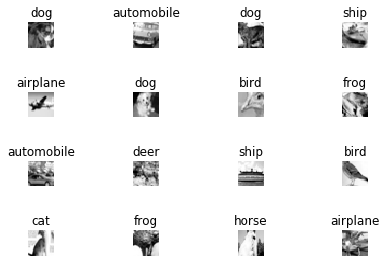

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
random.seed(1)

#names, data, labels 조회
names, data, labels = read_data('./cifar-10-batches-py')

def show_some_examples(names, data, labels):
    plt.figure()
    rows, cols = 4, 4
    random_idxs = random.sample(range(len(data)), rows * cols)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        j = random_idxs[i]
        plt.title(names[labels[j]])
        img = np.reshape(data[j, :], (24, 24))
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('cifar_examples.png')

show_some_examples(names, data, labels)

### 4.2 Convolutions & maxpool

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cifar_tools
import tensorflow as tf

names, data, labels = \
    cifar_tools.read_data('./cifar-10-batches-py')


def show_conv_results(data, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0, :, :, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()


def show_weights(W, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


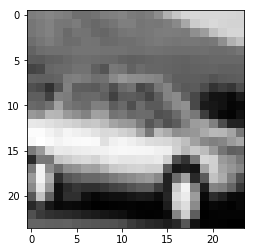

In [72]:
raw_data = data[4, :]
raw_img = np.reshape(raw_data, (24, 24))
plt.figure()
plt.imshow(raw_img, cmap='Greys_r')
plt.show()

In [73]:
x = tf.reshape(raw_data, shape=[-1, 24, 24, 1])
W = tf.Variable(tf.random_normal([5, 5, 1, 32]))
b = tf.Variable(tf.random_normal([32]))

conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
conv_with_b = tf.nn.bias_add(conv, b)
conv_out = tf.nn.relu(conv_with_b)

k = 2
maxpool = tf.nn.max_pool(conv_out, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

weights:


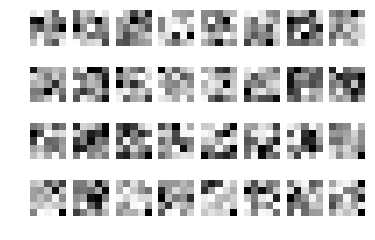

convolution results:
(1, 24, 24, 32)


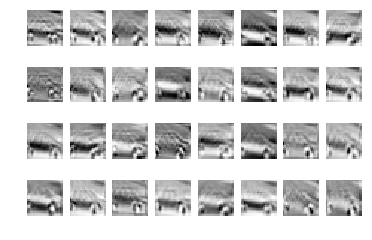

convolution with bias and relu:
(1, 24, 24, 32)


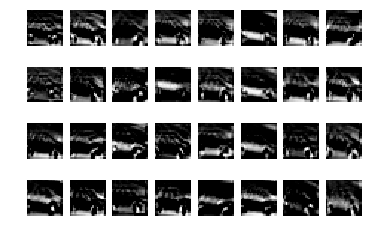

maxpool after all the convolutions:
(1, 12, 12, 32)


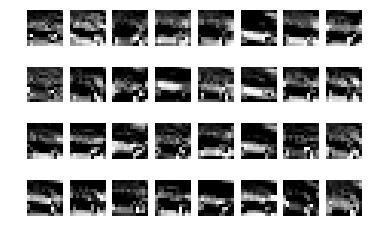

In [74]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    W_val = sess.run(W)
    print('weights:')
    show_weights(W_val)

    conv_val = sess.run(conv)
    print('convolution results:')
    print(np.shape(conv_val))
    show_conv_results(conv_val)
    

    conv_out_val = sess.run(conv_out)
    print('convolution with bias and relu:')
    print(np.shape(conv_out_val))
    show_conv_results(conv_out_val)


    maxpool_val = sess.run(maxpool)
    print('maxpool after all the convolutions:')
    print(np.shape(maxpool_val))
    show_conv_results(maxpool_val)

### 4.3 Convolution Neural Networks

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import cifar_tools
import tensorflow as tf

learning_rate = 0.001

# names: Label Dictionary, Array
# Data: Training Data
# Labels: Vector
names, data, labels = \
    cifar_tools.read_data('./cifar-10-batches-py')

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


In [78]:
x = tf.placeholder(tf.float32, [None, 24 * 24])    # (50000, 576) 
y = tf.placeholder(tf.float32, [None, len(names)]) # (50000, 10), One-Hot Encoding 
W1 = tf.Variable(tf.random_normal([5, 5, 1, 64]))  # 필터: (5, 5, 1), 64개
b1 = tf.Variable(tf.random_normal([64]))           # Bias: 64 
W2 = tf.Variable(tf.random_normal([5, 5, 64, 64])) # 
b2 = tf.Variable(tf.random_normal([64]))
W3 = tf.Variable(tf.random_normal([6*6*64, 1024]))
b3 = tf.Variable(tf.random_normal([1024]))
W_out = tf.Variable(tf.random_normal([1024, len(names)]))
b_out = tf.Variable(tf.random_normal([len(names)]))

In [79]:
def conv_layer(x, W, b):
    conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
    conv_with_b = tf.nn.bias_add(conv, b)
    conv_out = tf.nn.relu(conv_with_b)
    return conv_out


def maxpool_layer(conv, k=2):
    return tf.nn.max_pool(conv, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [80]:
def model():
    x_reshaped = tf.reshape(x, shape=[-1, 24, 24, 1]) #input (24, 24, 1)

    conv_out1 = conv_layer(x_reshaped, W1, b1) #input (24, 24, 1) W1: (5, 5, 1) channel: 64 bias: 64
    maxpool_out1 = maxpool_layer(conv_out1)
    norm1 = tf.nn.lrn(maxpool_out1, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75) # channel 64
    conv_out2 = conv_layer(norm1, W2, b2)  # Input (12, 12, 64), W2: (5, 5, 64) # channel 64 bias: 64
    norm2 = tf.nn.lrn(conv_out2, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75)
    maxpool_out2 = maxpool_layer(norm2) #output (6, 6, 64)

    maxpool_reshaped = tf.reshape(maxpool_out2, [-1, W3.get_shape().as_list()[0]])
    local = tf.add(tf.matmul(maxpool_reshaped, W3), b3)
    local_out = tf.nn.relu(local)

    out = tf.add(tf.matmul(local_out, W_out), b_out)
    return out

In [81]:
model_op = model()

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=model_op, labels=y)
)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(model_op, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [82]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    onehot_labels = tf.one_hot(labels, len(names), on_value=1., off_value=0., axis=-1)
    onehot_vals = sess.run(onehot_labels)
    batch_size = len(data) // 200
    print('batch size', batch_size)
    for j in range(0, 1000):
        avg_accuracy_val = 0.
        batch_count = 0.
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size, :]
            batch_onehot_vals = onehot_vals[i:i+batch_size, :]
            _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: batch_data, y: batch_onehot_vals})
            avg_accuracy_val += accuracy_val
            batch_count += 1.
        avg_accuracy_val /= batch_count
        print('Epoch {}. Avg accuracy {}'.format(j, avg_accuracy_val))

batch size 250
Epoch 0. Avg accuracy 0.20258000012487173
Epoch 1. Avg accuracy 0.2633800015598535
Epoch 2. Avg accuracy 0.28100000143051146
Epoch 3. Avg accuracy 0.2946800015866756
Epoch 4. Avg accuracy 0.3057800017297268
Epoch 5. Avg accuracy 0.3156800017505884
Epoch 6. Avg accuracy 0.32153999984264375
Epoch 7. Avg accuracy 0.32854000069200995
Epoch 8. Avg accuracy 0.3347600008547306
Epoch 9. Avg accuracy 0.3411000010371208
Epoch 10. Avg accuracy 0.3476600012183189
Epoch 11. Avg accuracy 0.35448000222444537
Epoch 12. Avg accuracy 0.3561600016802549


KeyboardInterrupt: 

### 학습 로그

```
batch size 250
Epoch 0. Avg accuracy 0.19152000330388547
Epoch 1. Avg accuracy 0.25635999694466594
Epoch 2. Avg accuracy 0.27939999781548974
Epoch 3. Avg accuracy 0.2957199999690056
Epoch 4. Avg accuracy 0.3054799986630678
Epoch 5. Avg accuracy 0.3132599999010563
Epoch 6. Avg accuracy 0.3227799978107214
Epoch 7. Avg accuracy 0.3291599979996681
Epoch 8. Avg accuracy 0.3335199984908104
Epoch 9. Avg accuracy 0.34087999776005745
Epoch 10. Avg accuracy 0.34539999842643737
Epoch 11. Avg accuracy 0.34931999936699865
Epoch 12. Avg accuracy 0.3532799991965294
Epoch 13. Avg accuracy 0.35811999946832657
Epoch 14. Avg accuracy 0.3605399985611439
Epoch 15. Avg accuracy 0.36557999774813654
Epoch 16. Avg accuracy 0.36623999893665315
Epoch 17. Avg accuracy 0.3748399989306927
Epoch 18. Avg accuracy 0.3747599983215332
Epoch 19. Avg accuracy 0.37829999879002574
Epoch 20. Avg accuracy 0.37785999715328217
Epoch 21. Avg accuracy 0.38386000230908396
Epoch 22. Avg accuracy 0.38941999807953837
Epoch 23. Avg accuracy 0.3898999999463558
Epoch 24. Avg accuracy 0.3935800002515316
Epoch 25. Avg accuracy 0.38961999893188476
Epoch 26. Avg accuracy 0.39469999879598616
Epoch 27. Avg accuracy 0.4006799964606762
Epoch 28. Avg accuracy 0.39600000143051145
Epoch 29. Avg accuracy 0.3968600009381771
Epoch 30. Avg accuracy 0.40699999913573265
Epoch 31. Avg accuracy 0.4146400000154972
Epoch 32. Avg accuracy 0.4208000005781651
Epoch 33. Avg accuracy 0.42127999782562253
Epoch 34. Avg accuracy 0.4137799996137619
Epoch 35. Avg accuracy 0.42272000104188917
Epoch 36. Avg accuracy 0.42284000143408773
Epoch 37. Avg accuracy 0.4237799981236458
Epoch 38. Avg accuracy 0.42259999573230744
Epoch 39. Avg accuracy 0.4295799992978573
Epoch 40. Avg accuracy 0.439019995033741
Epoch 41. Avg accuracy 0.43277999833226205
Epoch 42. Avg accuracy 0.4258399990200996
Epoch 43. Avg accuracy 0.43423999920487405
Epoch 44. Avg accuracy 0.45453999847173693
Epoch 45. Avg accuracy 0.4394799982011318
Epoch 46. Avg accuracy 0.4496599994599819
Epoch 47. Avg accuracy 0.4425800010561943
Epoch 48. Avg accuracy 0.44245999842882155
Epoch 49. Avg accuracy 0.4350000013411045
Epoch 50. Avg accuracy 0.4605799974501133
Epoch 51. Avg accuracy 0.45770000010728834
Epoch 52. Avg accuracy 0.4655199958384037
Epoch 53. Avg accuracy 0.45325999945402146
Epoch 54. Avg accuracy 0.4560199970006943
Epoch 55. Avg accuracy 0.44923999786376956
Epoch 56. Avg accuracy 0.4571200004220009
Epoch 57. Avg accuracy 0.46137999787926676
Epoch 58. Avg accuracy 0.4529600004851818
Epoch 59. Avg accuracy 0.4699999974668026
Epoch 60. Avg accuracy 0.47223999962210655
Epoch 61. Avg accuracy 0.4652999985218048
Epoch 62. Avg accuracy 0.49137999951839445
Epoch 63. Avg accuracy 0.4793799975514412
Epoch 64. Avg accuracy 0.44779999732971193
Epoch 65. Avg accuracy 0.4812399964034557
Epoch 66. Avg accuracy 0.49239999920129773
Epoch 67. Avg accuracy 0.478599998652935
Epoch 68. Avg accuracy 0.49325999662280084
Epoch 69. Avg accuracy 0.4782799953222275
Epoch 70. Avg accuracy 0.4667399971932173
Epoch 71. Avg accuracy 0.4871000000834465
Epoch 72. Avg accuracy 0.48845999941229823
Epoch 73. Avg accuracy 0.482579997330904
Epoch 74. Avg accuracy 0.4899399966001511
Epoch 75. Avg accuracy 0.4825400006771088
Epoch 76. Avg accuracy 0.45903999865055084
Epoch 77. Avg accuracy 0.4941399945318699
Epoch 78. Avg accuracy 0.4723799967765808
Epoch 79. Avg accuracy 0.47193999871611597
Epoch 80. Avg accuracy 0.5006600002944469
Epoch 81. Avg accuracy 0.4973799967765808
Epoch 82. Avg accuracy 0.5107199962437153
Epoch 83. Avg accuracy 0.49781999707221986
Epoch 84. Avg accuracy 0.4739399961382151
Epoch 85. Avg accuracy 0.4901799973845482
Epoch 86. Avg accuracy 0.494079999178648
Epoch 87. Avg accuracy 0.5053799973428249
Epoch 88. Avg accuracy 0.4824999986588955
Epoch 89. Avg accuracy 0.5010399955511093
Epoch 90. Avg accuracy 0.501519999653101
Epoch 91. Avg accuracy 0.5046400001645088
Epoch 92. Avg accuracy 0.51563999786973
Epoch 93. Avg accuracy 0.501779995560646
Epoch 94. Avg accuracy 0.5378999970853329
Epoch 95. Avg accuracy 0.5078599965572357
Epoch 96. Avg accuracy 0.5187199999392033
Epoch 97. Avg accuracy 0.4921999979019165
Epoch 98. Avg accuracy 0.500859996676445
Epoch 99. Avg accuracy 0.5020599972456694
Epoch 100. Avg accuracy 0.5271399988234043
Epoch 101. Avg accuracy 0.5261799983680249
Epoch 102. Avg accuracy 0.4799199987202883
Epoch 103. Avg accuracy 0.5283999967575074
Epoch 104. Avg accuracy 0.5205199982225895
Epoch 105. Avg accuracy 0.5397799986600876
Epoch 106. Avg accuracy 0.5293599992990494
Epoch 107. Avg accuracy 0.5168799953907728
Epoch 108. Avg accuracy 0.5129999995231629
Epoch 109. Avg accuracy 0.5318599927425385
Epoch 110. Avg accuracy 0.5456999972462654
Epoch 111. Avg accuracy 0.5599399994313717
Epoch 112. Avg accuracy 0.49951999880373477
Epoch 113. Avg accuracy 0.4951799981296062
Epoch 114. Avg accuracy 0.527620000243187
Epoch 115. Avg accuracy 0.5099799961596727
Epoch 116. Avg accuracy 0.5317799977958202
Epoch 117. Avg accuracy 0.5215399979054928
Epoch 118. Avg accuracy 0.5327199956774712
Epoch 119. Avg accuracy 0.5513999971747399
Epoch 120. Avg accuracy 0.4843400011211634
Epoch 121. Avg accuracy 0.5326199966669083
Epoch 122. Avg accuracy 0.5253799952566623
Epoch 123. Avg accuracy 0.5332999940216542
Epoch 124. Avg accuracy 0.5580000002682209
Epoch 125. Avg accuracy 0.5529399952292442
Epoch 126. Avg accuracy 0.5781199970841407
Epoch 127. Avg accuracy 0.5222799986600876
Epoch 128. Avg accuracy 0.5226199966669083
Epoch 129. Avg accuracy 0.5437399984896183
Epoch 130. Avg accuracy 0.5438599994778633
Epoch 131. Avg accuracy 0.5345199979841709
Epoch 132. Avg accuracy 0.5242400000989437
Epoch 133. Avg accuracy 0.5107999947667122
Epoch 134. Avg accuracy 0.5565799941122532
Epoch 135. Avg accuracy 0.5224399976432323
Epoch 136. Avg accuracy 0.5447399939596653
Epoch 137. Avg accuracy 0.5590399943292141
Epoch 138. Avg accuracy 0.5344599983096123
Epoch 139. Avg accuracy 0.5291199944913387
Epoch 140. Avg accuracy 0.5533999975025654
Epoch 141. Avg accuracy 0.5414599953591823
Epoch 142. Avg accuracy 0.5496599976718426
Epoch 143. Avg accuracy 0.5816399915516377
Epoch 144. Avg accuracy 0.5833599978685379
Epoch 145. Avg accuracy 0.5322200007736683
Epoch 146. Avg accuracy 0.5253999957442284
Epoch 147. Avg accuracy 0.5666399930417537
Epoch 148. Avg accuracy 0.5283999980986118
Epoch 149. Avg accuracy 0.5535799960792065
Epoch 150. Avg accuracy 0.5665999981760979
Epoch 151. Avg accuracy 0.5433599951863289
Epoch 152. Avg accuracy 0.567879992723465
Epoch 153. Avg accuracy 0.5500199970602989
Epoch 154. Avg accuracy 0.5661599959433079
Epoch 155. Avg accuracy 0.5481199991703033
Epoch 156. Avg accuracy 0.5359799955785275
Epoch 157. Avg accuracy 0.5528799940645694
Epoch 158. Avg accuracy 0.5410199955105781
Epoch 159. Avg accuracy 0.542959995791316
Epoch 160. Avg accuracy 0.5548399993777275
Epoch 161. Avg accuracy 0.5508399972319603
Epoch 162. Avg accuracy 0.5830599945783616
Epoch 163. Avg accuracy 0.6013999958336353
Epoch 164. Avg accuracy 0.5715199959278107
Epoch 165. Avg accuracy 0.5747599969804287
Epoch 166. Avg accuracy 0.5931599995493889
Epoch 167. Avg accuracy 0.5731999942660332
Epoch 168. Avg accuracy 0.6031799975037575
Epoch 169. Avg accuracy 0.5626599973440171
Epoch 170. Avg accuracy 0.5946199947595596
Epoch 171. Avg accuracy 0.5860399955511093
Epoch 172. Avg accuracy 0.5914599938690662
Epoch 173. Avg accuracy 0.5518600001931191
Epoch 174. Avg accuracy 0.5821199955046177
Epoch 175. Avg accuracy 0.5536199955642224
Epoch 176. Avg accuracy 0.5940399977564812
Epoch 177. Avg accuracy 0.577959995418787
Epoch 178. Avg accuracy 0.5755799977481365
Epoch 179. Avg accuracy 0.5637999987602234
Epoch 180. Avg accuracy 0.5551999971270561
Epoch 181. Avg accuracy 0.5911799953877925
Epoch 182. Avg accuracy 0.580479996651411
Epoch 183. Avg accuracy 0.6009799946844577
Epoch 184. Avg accuracy 0.5820199991762638
Epoch 185. Avg accuracy 0.6011199951171875
Epoch 186. Avg accuracy 0.5330599921941758
Epoch 187. Avg accuracy 0.5640599942207336
Epoch 188. Avg accuracy 0.5529399959743023
Epoch 189. Avg accuracy 0.5689599943161011
Epoch 190. Avg accuracy 0.5685799977183342
Epoch 191. Avg accuracy 0.5718999914824963
Epoch 192. Avg accuracy 0.5605199961364269
Epoch 193. Avg accuracy 0.5662199929356575
Epoch 194. Avg accuracy 0.5738199989497662
Epoch 195. Avg accuracy 0.5827199973165988
Epoch 196. Avg accuracy 0.586220000833273
Epoch 197. Avg accuracy 0.5601199990510941
Epoch 198. Avg accuracy 0.5645599961280823
Epoch 199. Avg accuracy 0.5497999942302704
Epoch 200. Avg accuracy 0.5653799968957901
Epoch 201. Avg accuracy 0.5894600003957748
Epoch 202. Avg accuracy 0.5581599971652031
Epoch 203. Avg accuracy 0.5851999932527542
Epoch 204. Avg accuracy 0.6116199980676175
Epoch 205. Avg accuracy 0.6088199964165688
Epoch 206. Avg accuracy 0.622379994392395
Epoch 207. Avg accuracy 0.5928199915587902
Epoch 208. Avg accuracy 0.6192599944770336
Epoch 209. Avg accuracy 0.632919999063015
Epoch 210. Avg accuracy 0.5906599968671798
Epoch 211. Avg accuracy 0.6005399991571904
Epoch 212. Avg accuracy 0.6336200001835823
Epoch 213. Avg accuracy 0.5849199968576432
Epoch 214. Avg accuracy 0.5948599947988987
Epoch 215. Avg accuracy 0.6128199960291386
Epoch 216. Avg accuracy 0.6254199989140033
Epoch 217. Avg accuracy 0.5968399976193904
Epoch 218. Avg accuracy 0.620299996137619
Epoch 219. Avg accuracy 0.5875999988615512
Epoch 220. Avg accuracy 0.6144599990546703
Epoch 221. Avg accuracy 0.630899995714426
Epoch 222. Avg accuracy 0.6335399994254112
Epoch 223. Avg accuracy 0.5501199960708618
Epoch 224. Avg accuracy 0.5843999956548214
Epoch 225. Avg accuracy 0.5937799951434135
Epoch 226. Avg accuracy 0.5943599933385849
Epoch 227. Avg accuracy 0.5693999959528446
Epoch 228. Avg accuracy 0.5859399969875813
Epoch 229. Avg accuracy 0.603959991633892
Epoch 230. Avg accuracy 0.5977399957180023
Epoch 231. Avg accuracy 0.5766199961304664
Epoch 232. Avg accuracy 0.5743199999630452
Epoch 233. Avg accuracy 0.5927399991452694
Epoch 234. Avg accuracy 0.6012999980151653
Epoch 235. Avg accuracy 0.6017399939894676
Epoch 236. Avg accuracy 0.5800199925899505
Epoch 237. Avg accuracy 0.6192199984192848
Epoch 238. Avg accuracy 0.6299799990653991
Epoch 239. Avg accuracy 0.6087399968504905
Epoch 240. Avg accuracy 0.6266399943828582
Epoch 241. Avg accuracy 0.5738999941945075
Epoch 242. Avg accuracy 0.5826799963414669
Epoch 243. Avg accuracy 0.5789199981093407
Epoch 244. Avg accuracy 0.5846199981868268
Epoch 245. Avg accuracy 0.5872199946641922
Epoch 246. Avg accuracy 0.5855399996042252
Epoch 247. Avg accuracy 0.5819399972259999
Epoch 248. Avg accuracy 0.6038199949264527
Epoch 249. Avg accuracy 0.5993399941921234
Epoch 250. Avg accuracy 0.5839999975264072
Epoch 251. Avg accuracy 0.5798399935662747
Epoch 252. Avg accuracy 0.5921600012481213
Epoch 253. Avg accuracy 0.6095599968731403
Epoch 254. Avg accuracy 0.6143199987709522
Epoch 255. Avg accuracy 0.6363199964165688
Epoch 256. Avg accuracy 0.6227599953114986
Epoch 257. Avg accuracy 0.6034799967706204
Epoch 258. Avg accuracy 0.6045799987018108
Epoch 259. Avg accuracy 0.6127999949455262
Epoch 260. Avg accuracy 0.5950399972498417
Epoch 261. Avg accuracy 0.58245999366045
Epoch 262. Avg accuracy 0.5909999977052212
Epoch 263. Avg accuracy 0.5955800004303455
Epoch 264. Avg accuracy 0.5973199969530105
Epoch 265. Avg accuracy 0.6055800005793571
Epoch 266. Avg accuracy 0.616819996535778
Epoch 267. Avg accuracy 0.6078399983048439
Epoch 268. Avg accuracy 0.618799998909235
Epoch 269. Avg accuracy 0.6181999960541725
Epoch 270. Avg accuracy 0.6321800011396408
Epoch 271. Avg accuracy 0.6491599988937378
Epoch 272. Avg accuracy 0.6465799988806248
Epoch 273. Avg accuracy 0.6675199988484383
Epoch 274. Avg accuracy 0.654519998729229
Epoch 275. Avg accuracy 0.6692999947071075
Epoch 276. Avg accuracy 0.6690399995446206
Epoch 277. Avg accuracy 0.6556799957156181
Epoch 278. Avg accuracy 0.6749199977517129
Epoch 279. Avg accuracy 0.6590200018882751
Epoch 280. Avg accuracy 0.6235599973797799
Epoch 281. Avg accuracy 0.6397399997711182
Epoch 282. Avg accuracy 0.6547400014102459
Epoch 283. Avg accuracy 0.6683200010657311
Epoch 284. Avg accuracy 0.6488599948585033
Epoch 285. Avg accuracy 0.6649999994039536
Epoch 286. Avg accuracy 0.6385199965536594
Epoch 287. Avg accuracy 0.6640399993956089
Epoch 288. Avg accuracy 0.6624199992418289
Epoch 289. Avg accuracy 0.6479800044000149
Epoch 290. Avg accuracy 0.6452399970591068
Epoch 291. Avg accuracy 0.6459199965000153
Epoch 292. Avg accuracy 0.623419998139143
Epoch 293. Avg accuracy 0.6451599974930287
Epoch 294. Avg accuracy 0.651900002360344
Epoch 295. Avg accuracy 0.650379998087883
Epoch 296. Avg accuracy 0.6632599997520446
Epoch 297. Avg accuracy 0.6301399970054626
Epoch 298. Avg accuracy 0.6265799935162067
Epoch 299. Avg accuracy 0.623239996433258
Epoch 300. Avg accuracy 0.613899995982647
Epoch 301. Avg accuracy 0.6078999924659729
Epoch 302. Avg accuracy 0.6051599933207035
Epoch 303. Avg accuracy 0.5826399967074394
Epoch 304. Avg accuracy 0.5947599948942661
Epoch 305. Avg accuracy 0.5930399969220161
Epoch 306. Avg accuracy 0.606919989734888
Epoch 307. Avg accuracy 0.6123799945414067
Epoch 308. Avg accuracy 0.6110399992763996
Epoch 309. Avg accuracy 0.6119799947738648
Epoch 310. Avg accuracy 0.622119999974966
Epoch 311. Avg accuracy 0.6262999981641769
Epoch 312. Avg accuracy 0.6260799975693225
Epoch 313. Avg accuracy 0.6283599995076656
Epoch 314. Avg accuracy 0.6256599943339824
Epoch 315. Avg accuracy 0.6552799978852272
Epoch 316. Avg accuracy 0.656999998241663
Epoch 317. Avg accuracy 0.6649599999189377
Epoch 318. Avg accuracy 0.6725999996066093
Epoch 319. Avg accuracy 0.6774400010704994
Epoch 320. Avg accuracy 0.6719999974966049
Epoch 321. Avg accuracy 0.6745000015199184
Epoch 322. Avg accuracy 0.6808799982070923
Epoch 323. Avg accuracy 0.6891800007224083
Epoch 324. Avg accuracy 0.6921200060844421
Epoch 325. Avg accuracy 0.6912000039219857
Epoch 326. Avg accuracy 0.6967200028896332
Epoch 327. Avg accuracy 0.6906000000238418
Epoch 328. Avg accuracy 0.6811400064826012
Epoch 329. Avg accuracy 0.6624599966406822
Epoch 330. Avg accuracy 0.648239999115467
Epoch 331. Avg accuracy 0.6811400076746941
Epoch 332. Avg accuracy 0.6967399999499321
Epoch 333. Avg accuracy 0.6740600000321865
Epoch 334. Avg accuracy 0.6703399974107742
Epoch 335. Avg accuracy 0.6629199960827827
Epoch 336. Avg accuracy 0.648839997947216
Epoch 337. Avg accuracy 0.6311599950492383
Epoch 338. Avg accuracy 0.6274799962341785
Epoch 339. Avg accuracy 0.6105599984526634
Epoch 340. Avg accuracy 0.6045399962365627
Epoch 341. Avg accuracy 0.6058399976789951
Epoch 342. Avg accuracy 0.6170199961960315
Epoch 343. Avg accuracy 0.622039997279644
Epoch 344. Avg accuracy 0.6210200001299381
Epoch 345. Avg accuracy 0.6316799978911877
Epoch 346. Avg accuracy 0.6319799917936325
Epoch 347. Avg accuracy 0.6334800004959107
Epoch 348. Avg accuracy 0.6480999955534935
Epoch 349. Avg accuracy 0.6473999974131585
Epoch 350. Avg accuracy 0.6451400011777878
Epoch 351. Avg accuracy 0.6446399964392185
Epoch 352. Avg accuracy 0.628499997407198
Epoch 353. Avg accuracy 0.6204799962043762
Epoch 354. Avg accuracy 0.6361599941551686
Epoch 355. Avg accuracy 0.6276399992406368
Epoch 356. Avg accuracy 0.6328999954462051
Epoch 357. Avg accuracy 0.6330199986696243
Epoch 358. Avg accuracy 0.6331999956071377
Epoch 359. Avg accuracy 0.6553599938750267
Epoch 360. Avg accuracy 0.6666000030934811
Epoch 361. Avg accuracy 0.6844000032544136
Epoch 362. Avg accuracy 0.6982200038433075
Epoch 363. Avg accuracy 0.7145000040531159
Epoch 364. Avg accuracy 0.7064200028777122
Epoch 365. Avg accuracy 0.6835800041258335
Epoch 366. Avg accuracy 0.709840005338192
Epoch 367. Avg accuracy 0.7150800025463104
Epoch 368. Avg accuracy 0.6880200010538101
Epoch 369. Avg accuracy 0.710280000269413
Epoch 370. Avg accuracy 0.7161400040984154
Epoch 371. Avg accuracy 0.7160600048303604
Epoch 372. Avg accuracy 0.7232000061869621
Epoch 373. Avg accuracy 0.696560001373291
Epoch 374. Avg accuracy 0.7113199999928475
Epoch 375. Avg accuracy 0.7245400032401085
Epoch 376. Avg accuracy 0.7070600032806397
Epoch 377. Avg accuracy 0.6982600021362305
Epoch 378. Avg accuracy 0.6889399999380111
Epoch 379. Avg accuracy 0.6755800013244152
Epoch 380. Avg accuracy 0.6827000057697297
Epoch 381. Avg accuracy 0.6669999979436397
Epoch 382. Avg accuracy 0.6566400018334388
Epoch 383. Avg accuracy 0.657580001950264
Epoch 384. Avg accuracy 0.6500200015306473
Epoch 385. Avg accuracy 0.643719996213913
Epoch 386. Avg accuracy 0.6468200013041496
Epoch 387. Avg accuracy 0.6464599986374379
Epoch 388. Avg accuracy 0.6453799958527088
Epoch 389. Avg accuracy 0.633259996920824
Epoch 390. Avg accuracy 0.6363599982857704
Epoch 391. Avg accuracy 0.645020001232624
Epoch 392. Avg accuracy 0.6335999990999699
Epoch 393. Avg accuracy 0.64391999989748
Epoch 394. Avg accuracy 0.6674400025606155
Epoch 395. Avg accuracy 0.666739998459816
Epoch 396. Avg accuracy 0.661239997446537
Epoch 397. Avg accuracy 0.689960001707077
Epoch 398. Avg accuracy 0.6969200026988983
Epoch 399. Avg accuracy 0.7059000033140183
Epoch 400. Avg accuracy 0.7118000027537346
Epoch 401. Avg accuracy 0.7153600084781647
Epoch 402. Avg accuracy 0.7111800023913384
Epoch 403. Avg accuracy 0.7210200056433678
Epoch 404. Avg accuracy 0.7337200078368187
Epoch 405. Avg accuracy 0.7112600065767765
Epoch 406. Avg accuracy 0.7271800023317337
Epoch 407. Avg accuracy 0.7350200054049492
Epoch 408. Avg accuracy 0.7321000051498413
Epoch 409. Avg accuracy 0.7260200078785419
Epoch 410. Avg accuracy 0.738000003695488
Epoch 411. Avg accuracy 0.7322400015592575
Epoch 412. Avg accuracy 0.7267600086331367
Epoch 413. Avg accuracy 0.7302600055932998
Epoch 414. Avg accuracy 0.7316600078344345
Epoch 415. Avg accuracy 0.7218600025773049
Epoch 416. Avg accuracy 0.6996000030636788
Epoch 417. Avg accuracy 0.6877600023150444
Epoch 418. Avg accuracy 0.6919400025904179
Epoch 419. Avg accuracy 0.676080002784729
Epoch 420. Avg accuracy 0.6642000004649162
Epoch 421. Avg accuracy 0.6611399991810322
Epoch 422. Avg accuracy 0.6485399967432022
Epoch 423. Avg accuracy 0.6540799984335899
Epoch 424. Avg accuracy 0.6557400006055832
Epoch 425. Avg accuracy 0.6556799975037575
Epoch 426. Avg accuracy 0.6530599993467331
Epoch 427. Avg accuracy 0.6515999989211559
Epoch 428. Avg accuracy 0.6687599992752076
Epoch 429. Avg accuracy 0.6693199959397316
Epoch 430. Avg accuracy 0.6740999975800515
Epoch 431. Avg accuracy 0.6935400021076202
Epoch 432. Avg accuracy 0.6920199981331825
Epoch 433. Avg accuracy 0.6916600069403649
Epoch 434. Avg accuracy 0.6883600029349327
Epoch 435. Avg accuracy 0.699860003888607
Epoch 436. Avg accuracy 0.6905400006473065
Epoch 437. Avg accuracy 0.6984600025415421
Epoch 438. Avg accuracy 0.7044400015473365
Epoch 439. Avg accuracy 0.7020600038766861
Epoch 440. Avg accuracy 0.70274000197649
Epoch 441. Avg accuracy 0.7022000035643577
Epoch 442. Avg accuracy 0.7059000018239021
Epoch 443. Avg accuracy 0.7011400049924851
Epoch 444. Avg accuracy 0.6959800073504447
Epoch 445. Avg accuracy 0.6811000016331673
Epoch 446. Avg accuracy 0.6764800021052361
Epoch 447. Avg accuracy 0.6763800022006035
Epoch 448. Avg accuracy 0.6696599997580052
Epoch 449. Avg accuracy 0.670519999563694
Epoch 450. Avg accuracy 0.6847799998521805
Epoch 451. Avg accuracy 0.6912400010228157
Epoch 452. Avg accuracy 0.7012400034070015
Epoch 453. Avg accuracy 0.7057000038027763
Epoch 454. Avg accuracy 0.7195400083065033
Epoch 455. Avg accuracy 0.7242400053143502
Epoch 456. Avg accuracy 0.7309800034761429
Epoch 457. Avg accuracy 0.7398800083994865
Epoch 458. Avg accuracy 0.7423600053787232
Epoch 459. Avg accuracy 0.7495200079679489
Epoch 460. Avg accuracy 0.7476400083303452
Epoch 461. Avg accuracy 0.7589200112223625
Epoch 462. Avg accuracy 0.7663000085949898
Epoch 463. Avg accuracy 0.7612600052356719
Epoch 464. Avg accuracy 0.7646800124645233
Epoch 465. Avg accuracy 0.7621200105547905
Epoch 466. Avg accuracy 0.764640007019043
Epoch 467. Avg accuracy 0.7681600096821785
Epoch 468. Avg accuracy 0.7730800077319145
Epoch 469. Avg accuracy 0.7749200117588043
Epoch 470. Avg accuracy 0.7657800105214119
Epoch 471. Avg accuracy 0.7742400136590004
Epoch 472. Avg accuracy 0.7545000052452088
Epoch 473. Avg accuracy 0.7674400076270104
Epoch 474. Avg accuracy 0.7727600112557411
Epoch 475. Avg accuracy 0.758820007443428
Epoch 476. Avg accuracy 0.7445800122618675
Epoch 477. Avg accuracy 0.7396400064229965
Epoch 478. Avg accuracy 0.734660005569458
Epoch 479. Avg accuracy 0.7308000048995018
Epoch 480. Avg accuracy 0.7149200087785721
Epoch 481. Avg accuracy 0.7146199995279312
Epoch 482. Avg accuracy 0.709200002849102
Epoch 483. Avg accuracy 0.7007200023531914
Epoch 484. Avg accuracy 0.6950800004601478
Epoch 485. Avg accuracy 0.6772000017762184
Epoch 486. Avg accuracy 0.6810000003874301
Epoch 487. Avg accuracy 0.6827200016379357
Epoch 488. Avg accuracy 0.6913399946689606
Epoch 489. Avg accuracy 0.6944600030779838
Epoch 490. Avg accuracy 0.7043400001525879
Epoch 491. Avg accuracy 0.6968599992990494
Epoch 492. Avg accuracy 0.6948800027370453
Epoch 493. Avg accuracy 0.7061000055074692
Epoch 494. Avg accuracy 0.7191200056672096
Epoch 495. Avg accuracy 0.7158600074052811
Epoch 496. Avg accuracy 0.7135200083255768
Epoch 497. Avg accuracy 0.706240001320839
Epoch 498. Avg accuracy 0.7019400066137313
Epoch 499. Avg accuracy 0.7028600001335144
Epoch 500. Avg accuracy 0.7014600023627281
Epoch 501. Avg accuracy 0.6983200007677078
Epoch 502. Avg accuracy 0.7014400088787078
Epoch 503. Avg accuracy 0.6923000013828278
Epoch 504. Avg accuracy 0.6966400042176246
Epoch 505. Avg accuracy 0.695620000064373
Epoch 506. Avg accuracy 0.7027200040221214
Epoch 507. Avg accuracy 0.70990000218153
Epoch 508. Avg accuracy 0.7124400016665459
Epoch 509. Avg accuracy 0.7194400051236153
Epoch 510. Avg accuracy 0.7281800073385238
Epoch 511. Avg accuracy 0.729320003092289
Epoch 512. Avg accuracy 0.736600005030632
Epoch 513. Avg accuracy 0.7404400044679642
Epoch 514. Avg accuracy 0.7457400101423264
Epoch 515. Avg accuracy 0.7533200117945671
Epoch 516. Avg accuracy 0.7605800086259842
Epoch 517. Avg accuracy 0.7626400086283683
Epoch 518. Avg accuracy 0.7756200045347214
Epoch 519. Avg accuracy 0.7803200072050095
Epoch 520. Avg accuracy 0.7839400139451027
Epoch 521. Avg accuracy 0.7828400111198426
Epoch 522. Avg accuracy 0.7878000074625016
Epoch 523. Avg accuracy 0.7763400080800057
Epoch 524. Avg accuracy 0.7769200086593628
Epoch 525. Avg accuracy 0.7784400114417076
Epoch 526. Avg accuracy 0.7649600052833557
Epoch 527. Avg accuracy 0.7715400078892708
Epoch 528. Avg accuracy 0.7575600072741508
Epoch 529. Avg accuracy 0.7632200071215629
Epoch 530. Avg accuracy 0.743720006942749
Epoch 531. Avg accuracy 0.7472000107169151
Epoch 532. Avg accuracy 0.7398000046610832
Epoch 533. Avg accuracy 0.7312400063872337
Epoch 534. Avg accuracy 0.7331600052118301
Epoch 535. Avg accuracy 0.7226200079917908
Epoch 536. Avg accuracy 0.7242400074005126
Epoch 537. Avg accuracy 0.7108600050210953
Epoch 538. Avg accuracy 0.7046200042963028
Epoch 539. Avg accuracy 0.700020002424717
Epoch 540. Avg accuracy 0.6913200044631957
Epoch 541. Avg accuracy 0.6990400001406669
Epoch 542. Avg accuracy 0.7057400041818619
Epoch 543. Avg accuracy 0.7129400005936622
Epoch 544. Avg accuracy 0.7202600058913231
Epoch 545. Avg accuracy 0.7237600049376488
Epoch 546. Avg accuracy 0.7166200059652329
Epoch 547. Avg accuracy 0.715960003733635
Epoch 548. Avg accuracy 0.7267200070619583
Epoch 549. Avg accuracy 0.7351400047540665
Epoch 550. Avg accuracy 0.7406600016355515
Epoch 551. Avg accuracy 0.7510000053048134
Epoch 552. Avg accuracy 0.7589600098133087
Epoch 553. Avg accuracy 0.763720001578331
Epoch 554. Avg accuracy 0.7690400114655495
Epoch 555. Avg accuracy 0.777200009226799
Epoch 556. Avg accuracy 0.7788200089335442
Epoch 557. Avg accuracy 0.7824600097537041
Epoch 558. Avg accuracy 0.7866400110721589
Epoch 559. Avg accuracy 0.792700012922287
Epoch 560. Avg accuracy 0.7981000101566315
Epoch 561. Avg accuracy 0.8016600075364113
Epoch 562. Avg accuracy 0.8022600090503693
Epoch 563. Avg accuracy 0.800760004222393
Epoch 564. Avg accuracy 0.8042200073599816
Epoch 565. Avg accuracy 0.8094600075483322
Epoch 566. Avg accuracy 0.8078800043463708
Epoch 567. Avg accuracy 0.8100800108909607
Epoch 568. Avg accuracy 0.8085600101947784
Epoch 569. Avg accuracy 0.8124200069904327
Epoch 570. Avg accuracy 0.8055000111460686
Epoch 571. Avg accuracy 0.806400009393692
Epoch 572. Avg accuracy 0.8076400083303451
Epoch 573. Avg accuracy 0.8077000126242637
Epoch 574. Avg accuracy 0.8049600079655648
Epoch 575. Avg accuracy 0.8023600077629089
Epoch 576. Avg accuracy 0.7841800072789192
Epoch 577. Avg accuracy 0.7782000079751015
Epoch 578. Avg accuracy 0.7683000072836876
Epoch 579. Avg accuracy 0.764680010676384
Epoch 580. Avg accuracy 0.7594400110840798
Epoch 581. Avg accuracy 0.75960000872612
Epoch 582. Avg accuracy 0.7495000076293945
Epoch 583. Avg accuracy 0.7342400059103966
Epoch 584. Avg accuracy 0.7375800094008446
Epoch 585. Avg accuracy 0.7381200098991394
Epoch 586. Avg accuracy 0.7361200073361397
Epoch 587. Avg accuracy 0.7429600059986115
Epoch 588. Avg accuracy 0.7500800111889839
Epoch 589. Avg accuracy 0.7573800060153008
Epoch 590. Avg accuracy 0.7661000135540962
Epoch 591. Avg accuracy 0.7664400061964989
Epoch 592. Avg accuracy 0.7584600093960762
Epoch 593. Avg accuracy 0.7587600108981133
Epoch 594. Avg accuracy 0.7584600108861923
Epoch 595. Avg accuracy 0.7445600041747094
Epoch 596. Avg accuracy 0.7530200058221816
Epoch 597. Avg accuracy 0.7605000078678131
Epoch 598. Avg accuracy 0.7694800055027008
Epoch 599. Avg accuracy 0.7799000099301339
Epoch 600. Avg accuracy 0.7838400045037269
Epoch 601. Avg accuracy 0.7856400075554848
Epoch 602. Avg accuracy 0.7985400089621544
Epoch 603. Avg accuracy 0.8066000124812126
Epoch 604. Avg accuracy 0.81118000715971
Epoch 605. Avg accuracy 0.8207000097632409
Epoch 606. Avg accuracy 0.8276400056481361
Epoch 607. Avg accuracy 0.8293200129270554
Epoch 608. Avg accuracy 0.8345400092005729
Epoch 609. Avg accuracy 0.8349000060558319
Epoch 610. Avg accuracy 0.8321800118684769
Epoch 611. Avg accuracy 0.835580008327961
Epoch 612. Avg accuracy 0.8349600094556808
Epoch 613. Avg accuracy 0.8360800084471702
Epoch 614. Avg accuracy 0.8305000111460685
Epoch 615. Avg accuracy 0.8347000104188919
Epoch 616. Avg accuracy 0.8289200076460839
Epoch 617. Avg accuracy 0.8339600059390068
Epoch 618. Avg accuracy 0.8240400084853172
Epoch 619. Avg accuracy 0.822180007994175
Epoch 620. Avg accuracy 0.8179800096154213
Epoch 621. Avg accuracy 0.8143800124526024
Epoch 622. Avg accuracy 0.8029800099134445
Epoch 623. Avg accuracy 0.7942600107192993
Epoch 624. Avg accuracy 0.7918600091338157
Epoch 625. Avg accuracy 0.793380012512207
Epoch 626. Avg accuracy 0.794520013332367
Epoch 627. Avg accuracy 0.796620012819767
Epoch 628. Avg accuracy 0.7925600123405456
Epoch 629. Avg accuracy 0.789940005838871
Epoch 630. Avg accuracy 0.7819200071692467
Epoch 631. Avg accuracy 0.7848200035095215
Epoch 632. Avg accuracy 0.773140005171299
Epoch 633. Avg accuracy 0.7721800065040588
Epoch 634. Avg accuracy 0.7709600082039834
Epoch 635. Avg accuracy 0.7728800058364869
Epoch 636. Avg accuracy 0.7765200033783912
Epoch 637. Avg accuracy 0.7749200078845024
Epoch 638. Avg accuracy 0.7746600091457367
Epoch 639. Avg accuracy 0.7852800053358078
Epoch 640. Avg accuracy 0.7893800064921379
Epoch 641. Avg accuracy 0.7965800109505653
Epoch 642. Avg accuracy 0.7995600101351737
Epoch 643. Avg accuracy 0.7933000081777573
Epoch 644. Avg accuracy 0.7949000060558319
Epoch 645. Avg accuracy 0.7980200129747391
Epoch 646. Avg accuracy 0.7935000050067902
Epoch 647. Avg accuracy 0.7977400109171867
Epoch 648. Avg accuracy 0.7995000112056733
Epoch 649. Avg accuracy 0.7991400080919265
Epoch 650. Avg accuracy 0.7976400083303452
Epoch 651. Avg accuracy 0.7954000073671341
Epoch 652. Avg accuracy 0.7996200060844422
Epoch 653. Avg accuracy 0.7978600093722343
Epoch 654. Avg accuracy 0.80170000821352
Epoch 655. Avg accuracy 0.7992600113153457
Epoch 656. Avg accuracy 0.7991000083088875
Epoch 657. Avg accuracy 0.7964000084996223
Epoch 658. Avg accuracy 0.792480006814003
Epoch 659. Avg accuracy 0.7980000111460686
Epoch 660. Avg accuracy 0.7925600096583366
Epoch 661. Avg accuracy 0.7956800037622451
Epoch 662. Avg accuracy 0.7955800101161004
Epoch 663. Avg accuracy 0.8063800135254859
Epoch 664. Avg accuracy 0.8112200099229813
Epoch 665. Avg accuracy 0.8100800082087517
Epoch 666. Avg accuracy 0.8106800144910813
Epoch 667. Avg accuracy 0.8075600099563599
Epoch 668. Avg accuracy 0.800380008816719
Epoch 669. Avg accuracy 0.8066000068187713
Epoch 670. Avg accuracy 0.8095400115847587
Epoch 671. Avg accuracy 0.8156600108742714
Epoch 672. Avg accuracy 0.8229800063371658
Epoch 673. Avg accuracy 0.8291200056672097
Epoch 674. Avg accuracy 0.8285200083255768
Epoch 675. Avg accuracy 0.8279400116205216
Epoch 676. Avg accuracy 0.8312200084328651
Epoch 677. Avg accuracy 0.8323000076413155
Epoch 678. Avg accuracy 0.830340006351471
Epoch 679. Avg accuracy 0.8381200063228608
Epoch 680. Avg accuracy 0.8423200118541717
Epoch 681. Avg accuracy 0.845920005440712
Epoch 682. Avg accuracy 0.8471200108528137
Epoch 683. Avg accuracy 0.8470600074529648
Epoch 684. Avg accuracy 0.8514200058579445
Epoch 685. Avg accuracy 0.8523400124907493
Epoch 686. Avg accuracy 0.8547600099444389
Epoch 687. Avg accuracy 0.8471400073170662
Epoch 688. Avg accuracy 0.8480800113081932
Epoch 689. Avg accuracy 0.8381000059843063
Epoch 690. Avg accuracy 0.8384400102496147
Epoch 691. Avg accuracy 0.833540013730526
Epoch 692. Avg accuracy 0.8303200104832649
Epoch 693. Avg accuracy 0.8264800053834915
Epoch 694. Avg accuracy 0.8240600070357322
Epoch 695. Avg accuracy 0.8282400047779084
Epoch 696. Avg accuracy 0.8237600088119507
Epoch 697. Avg accuracy 0.821040009856224
Epoch 698. Avg accuracy 0.8205000054836273
Epoch 699. Avg accuracy 0.8196600109338761
Epoch 700. Avg accuracy 0.8208800080418587
Epoch 701. Avg accuracy 0.8262800058722496
Epoch 702. Avg accuracy 0.825020007789135
Epoch 703. Avg accuracy 0.823540005683899
Epoch 704. Avg accuracy 0.8254600074887276
Epoch 705. Avg accuracy 0.8298600101470948
Epoch 706. Avg accuracy 0.8271400114893913
Epoch 707. Avg accuracy 0.8247000083327294
Epoch 708. Avg accuracy 0.8228400066494942
Epoch 709. Avg accuracy 0.825540012717247
Epoch 710. Avg accuracy 0.8201200088858605
Epoch 711. Avg accuracy 0.823560012280941
Epoch 712. Avg accuracy 0.8231000074744225
Epoch 713. Avg accuracy 0.8188400042057037
Epoch 714. Avg accuracy 0.8163600096106529
Epoch 715. Avg accuracy 0.8242200151085853
Epoch 716. Avg accuracy 0.8280000078678131
Epoch 717. Avg accuracy 0.8320000049471855
Epoch 718. Avg accuracy 0.834780005812645
Epoch 719. Avg accuracy 0.8343000116944314
Epoch 720. Avg accuracy 0.8360800078511238
Epoch 721. Avg accuracy 0.8434800094366074
Epoch 722. Avg accuracy 0.8457400071620941
Epoch 723. Avg accuracy 0.8476800119876862
Epoch 724. Avg accuracy 0.8482600072026253
Epoch 725. Avg accuracy 0.8462800124287605
Epoch 726. Avg accuracy 0.8444000089168548
Epoch 727. Avg accuracy 0.8396000090241432
Epoch 728. Avg accuracy 0.8384000089764595
Epoch 729. Avg accuracy 0.839720006287098
Epoch 730. Avg accuracy 0.8372000104188919
Epoch 731. Avg accuracy 0.837580013871193
Epoch 732. Avg accuracy 0.8321200054883957
Epoch 733. Avg accuracy 0.8276000031828881
Epoch 734. Avg accuracy 0.8266200071573258
Epoch 735. Avg accuracy 0.8352000108361244
Epoch 736. Avg accuracy 0.8432600119709969
Epoch 737. Avg accuracy 0.8510000115633011
Epoch 738. Avg accuracy 0.8534000065922737
Epoch 739. Avg accuracy 0.8602000123262405
Epoch 740. Avg accuracy 0.8625800094008446
Epoch 741. Avg accuracy 0.8679400101304054
Epoch 742. Avg accuracy 0.8681400126218796
Epoch 743. Avg accuracy 0.8685800114274025
Epoch 744. Avg accuracy 0.8718600171804428
Epoch 745. Avg accuracy 0.8696000090241433
Epoch 746. Avg accuracy 0.8721800139546394
Epoch 747. Avg accuracy 0.8757000121474267
Epoch 748. Avg accuracy 0.8754800149798393
Epoch 749. Avg accuracy 0.8814600136876106
Epoch 750. Avg accuracy 0.8778000164031983
Epoch 751. Avg accuracy 0.8774600142240524
Epoch 752. Avg accuracy 0.8770000150799752
Epoch 753. Avg accuracy 0.8785400179028511
Epoch 754. Avg accuracy 0.8763000175356865
Epoch 755. Avg accuracy 0.8740200152993203
Epoch 756. Avg accuracy 0.8762800166010857
Epoch 757. Avg accuracy 0.8767000171542167
Epoch 758. Avg accuracy 0.8807400178909301
Epoch 759. Avg accuracy 0.8763800159096717
Epoch 760. Avg accuracy 0.876640014052391
Epoch 761. Avg accuracy 0.8814400163292885
Epoch 762. Avg accuracy 0.8798400127887726
Epoch 763. Avg accuracy 0.8810600152611733
Epoch 764. Avg accuracy 0.8837400153279305
Epoch 765. Avg accuracy 0.8826000189781189
Epoch 766. Avg accuracy 0.8842600208520889
Epoch 767. Avg accuracy 0.881220016181469
Epoch 768. Avg accuracy 0.8795600178837776
Epoch 769. Avg accuracy 0.8795400193333626
Epoch 770. Avg accuracy 0.8727200189232827
Epoch 771. Avg accuracy 0.87754001557827
Epoch 772. Avg accuracy 0.8809400156140328
Epoch 773. Avg accuracy 0.8875800195336342
Epoch 774. Avg accuracy 0.8867000216245651
Epoch 775. Avg accuracy 0.8868000173568725
Epoch 776. Avg accuracy 0.8887400183081627
Epoch 777. Avg accuracy 0.8849600175023079
Epoch 778. Avg accuracy 0.8831400164961815
Epoch 779. Avg accuracy 0.8718800157308578
Epoch 780. Avg accuracy 0.8688600176572799
Epoch 781. Avg accuracy 0.8658600106835366
Epoch 782. Avg accuracy 0.8737400156259537
Epoch 783. Avg accuracy 0.8754800152778626
Epoch 784. Avg accuracy 0.8725800135731697
Epoch 785. Avg accuracy 0.8755600181221962
Epoch 786. Avg accuracy 0.8820800185203552
Epoch 787. Avg accuracy 0.8842200151085854
Epoch 788. Avg accuracy 0.8831200158596039
Epoch 789. Avg accuracy 0.8898400184512139
Epoch 790. Avg accuracy 0.8894400200247765
Epoch 791. Avg accuracy 0.8947200229763985
Epoch 792. Avg accuracy 0.8957600209116936
Epoch 793. Avg accuracy 0.9022000241279602
Epoch 794. Avg accuracy 0.9046800261735917
Epoch 795. Avg accuracy 0.9049000275135041
Epoch 796. Avg accuracy 0.9111000281572342
Epoch 797. Avg accuracy 0.9112800282239913
Epoch 798. Avg accuracy 0.9152200356125831
Epoch 799. Avg accuracy 0.9145600327849388
Epoch 800. Avg accuracy 0.9153200277686119
Epoch 801. Avg accuracy 0.9156000301241874
Epoch 802. Avg accuracy 0.9131000277400017
Epoch 803. Avg accuracy 0.9162200334668159
Epoch 804. Avg accuracy 0.914380026459694
Epoch 805. Avg accuracy 0.9174600347876549
Epoch 806. Avg accuracy 0.9126200324296951
Epoch 807. Avg accuracy 0.9159600305557251
Epoch 808. Avg accuracy 0.9162000322341919
Epoch 809. Avg accuracy 0.917740027308464
Epoch 810. Avg accuracy 0.9154200327396392
Epoch 811. Avg accuracy 0.9143200314044952
Epoch 812. Avg accuracy 0.912300029695034
Epoch 813. Avg accuracy 0.9100400277972222
Epoch 814. Avg accuracy 0.9052200275659561
Epoch 815. Avg accuracy 0.899420023560524
Epoch 816. Avg accuracy 0.8952000194787979
Epoch 817. Avg accuracy 0.892860018312931
Epoch 818. Avg accuracy 0.8934800213575363
Epoch 819. Avg accuracy 0.8961600181460381
Epoch 820. Avg accuracy 0.896820020377636
Epoch 821. Avg accuracy 0.8992400217056274
Epoch 822. Avg accuracy 0.897720020711422
Epoch 823. Avg accuracy 0.8978600153326988
Epoch 824. Avg accuracy 0.9040200218558312
Epoch 825. Avg accuracy 0.909500027000904
Epoch 826. Avg accuracy 0.9123400273919106
Epoch 827. Avg accuracy 0.91086002856493
Epoch 828. Avg accuracy 0.9120000278949738
Epoch 829. Avg accuracy 0.9110000303387642
Epoch 830. Avg accuracy 0.9084000277519226
Epoch 831. Avg accuracy 0.9052800273895264
Epoch 832. Avg accuracy 0.904500022828579
Epoch 833. Avg accuracy 0.9074200254678726
Epoch 834. Avg accuracy 0.9186200308799743
Epoch 835. Avg accuracy 0.9164000326395034
Epoch 836. Avg accuracy 0.9199800291657447
Epoch 837. Avg accuracy 0.9231600332260131
Epoch 838. Avg accuracy 0.9254000380635261
Epoch 839. Avg accuracy 0.9229000341892243
Epoch 840. Avg accuracy 0.9215200299024582
Epoch 841. Avg accuracy 0.9224000352621079
Epoch 842. Avg accuracy 0.922480036020279
Epoch 843. Avg accuracy 0.9228800314664841
Epoch 844. Avg accuracy 0.9224200338125229
Epoch 845. Avg accuracy 0.9209200346469879
Epoch 846. Avg accuracy 0.9223200356960297
Epoch 847. Avg accuracy 0.9258600389957428
Epoch 848. Avg accuracy 0.9287400418519973
Epoch 849. Avg accuracy 0.9326000407338142
Epoch 850. Avg accuracy 0.9335800421237945
Epoch 851. Avg accuracy 0.9367000424861908
Epoch 852. Avg accuracy 0.9340200418233872
Epoch 853. Avg accuracy 0.9313200429081917
Epoch 854. Avg accuracy 0.9293600413203239
Epoch 855. Avg accuracy 0.9252600359916687
Epoch 856. Avg accuracy 0.916000035405159
Epoch 857. Avg accuracy 0.9203600347042084
Epoch 858. Avg accuracy 0.9272800388932229
Epoch 859. Avg accuracy 0.9292200356721878
Epoch 860. Avg accuracy 0.9288400420546532
Epoch 861. Avg accuracy 0.9292800426483154
Epoch 862. Avg accuracy 0.9371600469946861
Epoch 863. Avg accuracy 0.939580046236515
Epoch 864. Avg accuracy 0.936960043311119
Epoch 865. Avg accuracy 0.9385200470685959
Epoch 866. Avg accuracy 0.9383400458097458
Epoch 867. Avg accuracy 0.9397200468182564
Epoch 868. Avg accuracy 0.9425600463151932
Epoch 869. Avg accuracy 0.9443000504374504
Epoch 870. Avg accuracy 0.942820051908493
Epoch 871. Avg accuracy 0.9438600507378578
Epoch 872. Avg accuracy 0.943980048596859
Epoch 873. Avg accuracy 0.9435600486397743
Epoch 874. Avg accuracy 0.9405000478029251
Epoch 875. Avg accuracy 0.9386600470542907
Epoch 876. Avg accuracy 0.9409400469064713
Epoch 877. Avg accuracy 0.940360044836998
Epoch 878. Avg accuracy 0.9393800479173661
Epoch 879. Avg accuracy 0.9406800493597984
Epoch 880. Avg accuracy 0.9423200455307961
Epoch 881. Avg accuracy 0.9423800480365753
Epoch 882. Avg accuracy 0.9445000487565994
Epoch 883. Avg accuracy 0.9447200477123261
Epoch 884. Avg accuracy 0.9450000500679017
Epoch 885. Avg accuracy 0.9486600509285927
Epoch 886. Avg accuracy 0.9473400500416755
Epoch 887. Avg accuracy 0.9478800538182258
Epoch 888. Avg accuracy 0.9474400514364243
Epoch 889. Avg accuracy 0.9479600527882576
Epoch 890. Avg accuracy 0.9507400485873222
Epoch 891. Avg accuracy 0.9473800507187843
Epoch 892. Avg accuracy 0.9499000510573388
Epoch 893. Avg accuracy 0.9539200574159622
Epoch 894. Avg accuracy 0.9548000574111939
Epoch 895. Avg accuracy 0.953800056874752
Epoch 896. Avg accuracy 0.9575400602817535
Epoch 897. Avg accuracy 0.955940057337284
Epoch 898. Avg accuracy 0.9565000599622726
Epoch 899. Avg accuracy 0.9558600577712059
Epoch 900. Avg accuracy 0.9564600598812103
Epoch 901. Avg accuracy 0.9571200567483902
Epoch 902. Avg accuracy 0.9529600566625596
Epoch 903. Avg accuracy 0.9513800510764122
Epoch 904. Avg accuracy 0.9507800540328026
Epoch 905. Avg accuracy 0.9491400516033173
Epoch 906. Avg accuracy 0.9502600532770157
Epoch 907. Avg accuracy 0.9547800531983376
Epoch 908. Avg accuracy 0.9584600579738617
Epoch 909. Avg accuracy 0.9575600609183311
Epoch 910. Avg accuracy 0.9582000601291657
Epoch 911. Avg accuracy 0.958460057079792
Epoch 912. Avg accuracy 0.9595000559091568
Epoch 913. Avg accuracy 0.9600400608778
Epoch 914. Avg accuracy 0.95998006016016
Epoch 915. Avg accuracy 0.9577600589394569
Epoch 916. Avg accuracy 0.9558800581097603
Epoch 917. Avg accuracy 0.9552000612020493
Epoch 918. Avg accuracy 0.9559600594639778
Epoch 919. Avg accuracy 0.9577200600504875
Epoch 920. Avg accuracy 0.952880057990551
Epoch 921. Avg accuracy 0.9542800581455231
Epoch 922. Avg accuracy 0.9539200592041016
Epoch 923. Avg accuracy 0.9520800572633743
Epoch 924. Avg accuracy 0.9549000576138497
Epoch 925. Avg accuracy 0.9553600585460663
Epoch 926. Avg accuracy 0.9591000607609749
Epoch 927. Avg accuracy 0.9600000610947609
Epoch 928. Avg accuracy 0.9614600625634193
Epoch 929. Avg accuracy 0.9614600631594657
Epoch 930. Avg accuracy 0.9626800581812859
Epoch 931. Avg accuracy 0.9627600625157356
Epoch 932. Avg accuracy 0.9631400635838508
Epoch 933. Avg accuracy 0.9621200615167618
Epoch 934. Avg accuracy 0.9634000620245934
Epoch 935. Avg accuracy 0.9637800645828247
Epoch 936. Avg accuracy 0.9631000626087188
Epoch 937. Avg accuracy 0.9627400618791581
Epoch 938. Avg accuracy 0.9639600610733032
Epoch 939. Avg accuracy 0.9629800599813462
Epoch 940. Avg accuracy 0.9638800632953644
Epoch 941. Avg accuracy 0.9634800615906716
Epoch 942. Avg accuracy 0.9636400610208511
Epoch 943. Avg accuracy 0.9654200634360314
Epoch 944. Avg accuracy 0.9664400652050972
Epoch 945. Avg accuracy 0.9639800611138344
Epoch 946. Avg accuracy 0.9654000669717788
Epoch 947. Avg accuracy 0.9642200616002082
Epoch 948. Avg accuracy 0.9637600600719451
Epoch 949. Avg accuracy 0.9653400653600692
Epoch 950. Avg accuracy 0.9628400617837906
Epoch 951. Avg accuracy 0.9647800654172898
Epoch 952. Avg accuracy 0.9633200594782829
Epoch 953. Avg accuracy 0.9648200613260269
Epoch 954. Avg accuracy 0.9629600659012795
Epoch 955. Avg accuracy 0.9654200619459152
Epoch 956. Avg accuracy 0.9699200651049614
Epoch 957. Avg accuracy 0.9721800673007965
Epoch 958. Avg accuracy 0.9746000698208809
Epoch 959. Avg accuracy 0.9770400705933571
Epoch 960. Avg accuracy 0.9776600757241249
Epoch 961. Avg accuracy 0.9749400696158409
Epoch 962. Avg accuracy 0.9779200735688209
Epoch 963. Avg accuracy 0.9790200716257096
Epoch 964. Avg accuracy 0.9787200731039047
Epoch 965. Avg accuracy 0.9792000710964203
Epoch 966. Avg accuracy 0.9784600737690926
Epoch 967. Avg accuracy 0.9780200710892677
Epoch 968. Avg accuracy 0.9805400770902634
Epoch 969. Avg accuracy 0.9795400735735893
Epoch 970. Avg accuracy 0.9814200782775879
Epoch 971. Avg accuracy 0.9811400762200355
Epoch 972. Avg accuracy 0.9800800731778145
Epoch 973. Avg accuracy 0.9774800708889961
Epoch 974. Avg accuracy 0.9803200751543045
Epoch 975. Avg accuracy 0.979080071747303
Epoch 976. Avg accuracy 0.981040073633194
Epoch 977. Avg accuracy 0.9833200788497924
Epoch 978. Avg accuracy 0.9813600778579712
Epoch 979. Avg accuracy 0.9804200717806816
Epoch 980. Avg accuracy 0.9799800744652748
Epoch 981. Avg accuracy 0.9808400776982308
Epoch 982. Avg accuracy 0.9797600722312927
Epoch 983. Avg accuracy 0.9800400713086128
Epoch 984. Avg accuracy 0.9812000769376755
Epoch 985. Avg accuracy 0.9785000705718994
Epoch 986. Avg accuracy 0.981900078356266
Epoch 987. Avg accuracy 0.9816200771927833
Epoch 988. Avg accuracy 0.9835000810027122
Epoch 989. Avg accuracy 0.9826000729203224
Epoch 990. Avg accuracy 0.9847400805354118
Epoch 991. Avg accuracy 0.9827200731635094
Epoch 992. Avg accuracy 0.9820200744271278
Epoch 993. Avg accuracy 0.9833200764656067
Epoch 994. Avg accuracy 0.9815400755405426
Epoch 995. Avg accuracy 0.982320077419281
Epoch 996. Avg accuracy 0.9856000789999961
Epoch 997. Avg accuracy 0.9844000786542892
Epoch 998. Avg accuracy 0.9846800771355629
Epoch 999. Avg accuracy 0.9809800750017166
```

### 4.5 Network Overview

----

```python
names, data, labels = cifar_tools.read_data('./cifar-10-batches-py')
```

![](http://taewanmerepo.github.io/2018/02/cnn/data.png)

```
_reshaped = tf.reshape(x, shape=[-1, 24, 24, 1])
```

![](http://taewanmerepo.github.io/2018/02/cnn/reshape.png)

![](http://taewanmerepo.github.io/2018/02/cnn/cnn2.png)